<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Google-Cloud-API" data-toc-modified-id="Google-Cloud-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Google Cloud API</a></span></li><li><span><a href="#keras-ocr" data-toc-modified-id="keras-ocr-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>keras-ocr</a></span></li><li><span><a href="#테서랙트" data-toc-modified-id="테서랙트-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>테서랙트</a></span></li><li><span><a href="#회고" data-toc-modified-id="회고-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>회고</a></span></li></ul></div>

In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import keras_ocr
import pytesseract
from PIL import Image
from pytesseract import Output

In [40]:
my_image_path = os.getenv('HOME')+'/aiffel/ocr_python/image/'
images = glob(my_image_path+'*.jpeg')  # *.jpeg파일을 리스트 형식으로 반환
images.sort()
images 

['/aiffel/aiffel/ocr_python/image/apocalypse.jpeg',
 '/aiffel/aiffel/ocr_python/image/arrest.jpeg',
 '/aiffel/aiffel/ocr_python/image/blackmirror.jpeg',
 '/aiffel/aiffel/ocr_python/image/door.jpeg',
 '/aiffel/aiffel/ocr_python/image/insomnia.jpeg',
 '/aiffel/aiffel/ocr_python/image/iron.jpeg',
 '/aiffel/aiffel/ocr_python/image/obsession.jpeg',
 '/aiffel/aiffel/ocr_python/image/thedarkestday.jpeg',
 '/aiffel/aiffel/ocr_python/image/training.jpeg',
 '/aiffel/aiffel/ocr_python/image/travel.jpeg',
 '/aiffel/aiffel/ocr_python/image/wood.jpeg']

In [3]:
len(images)

11

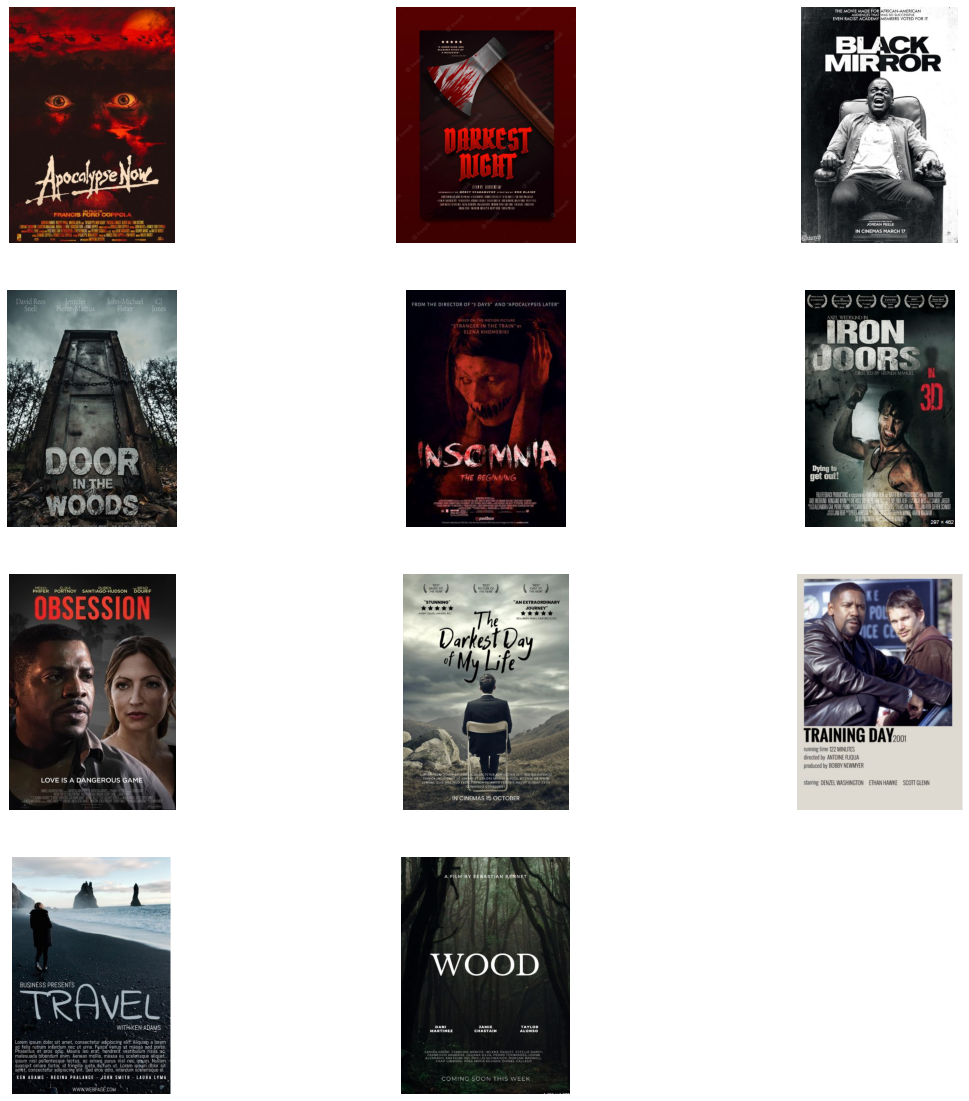

In [4]:
plt.figure(figsize=(20,20))

for idx, image_path in enumerate(images):
    plt.subplot(4, 3, idx+1)
    image = img.imread(image_path)
    plt.imshow(image)
    plt.axis('off')

# Google Cloud API

In [7]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [8]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/rock-baton-373509-da17dab9abe4.json'

# # 위에서 정의한 OCR API 이용 함수를 호출.
for image in images:
    detect_text(image)


total 4128
-rw-r--r-- 1 root root   71413 Jan  8 11:16  blackmirror.jpeg
-rw-r--r-- 1 root root 4137767 Jan  8 15:06 '[E-15]_ocr.ipynb'
drwxr-xr-x 3 root root    4096 Jan  8 14:52  image
drwxr-xr-x 2 root root    4096 Jan  8 14:31  output
-rw-r--r-- 1 root root    2320 Jan  2 09:15  rock-baton-373509-da17dab9abe4.json


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


Texts:

"Apocalypse Now
FRANCIS FORD COPPOLA
FRANCES FORD COPPOLA
MARKS
WITH MAC"

"Apocalypse"

"Now"

"FRANCIS"

"FORD"

"COPPOLA"

"FRANCES"

"FORD"

"COPPOLA"

"MARKS"

"WITH"

"MAC"
bounds: (325,537),(337,537),(337,544),(325,544)
Texts:

"freepik
freepik
freepik
freepik
"A SUPER DARK AND
SCARIEST STORY OF
A MURDERER
VARAUDER
freepik
freepik
freep
DARKEST
NIGHT
freepik
freepik
freepik
freepik
FILM BY LAURAGING BA
SCREAMPLAY BY MERCY SCARAMUCHE DIRECTED BYRON BLAINE
MEZINTA FED COMPANY / HOODIE CHARGAAT IN THE MAIN 12-DIG FORE PROBLEN
CATE CERTIFEROUTER LIGE VERETE UNA COLLAP
AY
AND CHE
MONG BEACHALAMAN
TRATAMENTE PARA M
freepik
freep
freepik"

"freepik"

"freepik"

"freepik"

"freepik"

"""

"A"

"SUPER"

"DARK"

"AND"

"SCARIEST"

"STORY"

"OF"

"A"

"MURDERER"

"VARAUDER"

"freepik"

"freepik"

"freep"

"DARKEST"

"NIGHT"

"freepik"

"freepik"

"freepik"

"freepik"

"FILM"

"BY"

"LAURAGING"

"BA"

"SCREAMPLAY"

"BY"

"MERCY"

"SCARAMUCHE"

"DIRECTED"

"BYRON"

"BLAINE"

"MEZINTA

In [69]:
detect_text(images[7]) # The Darkest Day of my life

Texts:

"BEST
MUSIC OF
THE YEAR
"STUNNING"
BEST
PICTURE OF
THE YEAR
AVERY DAVIS, LARANA, INC.
BEST
CAST OF
THE YEAR'
"AN EXTRAORDINARY
JOURNEY"
✰✰✰✰✰
BENJAMIN SHAH, SALFORD & CO.
. The
Darkest Day
of My Life
LOREM IPSUM DOLOR SIT AMET, CONSECTETUR ADIPISICING ELIT, SED DO EIUSMOD
TEMPOR INCIDIDUNT UT LABORE ET DOLORE MAGNA ALIQUA. UT ENIM AD MINIM
VENIAM, QUIS NOSTRUD EXERCITATION ULLAMCO LABORIS NISI UT ALIQUIP EX EA
COMMODO CONSEQUAT.
IN CINEMAS 15 OCTOBER"

"BEST"

"MUSIC"

"OF"

"THE"

"YEAR"

"""

"STUNNING"

"""

"BEST"

"PICTURE"

"OF"

"THE"

"YEAR"

"AVERY"

"DAVIS"

","

"LARANA"

","

"INC"

"."

"BEST"

"CAST"

"OF"

"THE"

"YEAR"

"'"

"""

"AN"

"EXTRAORDINARY"

"JOURNEY"

"""

"✰✰✰✰✰"

"BENJAMIN"

"SHAH"

","

"SALFORD"

"&"

"CO"

"."

"."

"The"

"Darkest"

"Day"

"of"

"My"

"Life"

"LOREM"

"IPSUM"

"DOLOR"

"SIT"

"AMET"

","

"CONSECTETUR"

"ADIPISICING"

"ELIT"

","

"SED"

"DO"

"EIUSMOD"

"TEMPOR"

"INCIDIDUNT"

"UT"

"LABORE"

"ET"

"DOLORE"

"MAGNA"

"ALIQUA"


# keras-ocr

In [9]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [10]:
images_keras_ocr = [ keras_ocr.tools.read(image) for image in images]
prediction_groups = [pipeline.recognize([image]) for image in images]

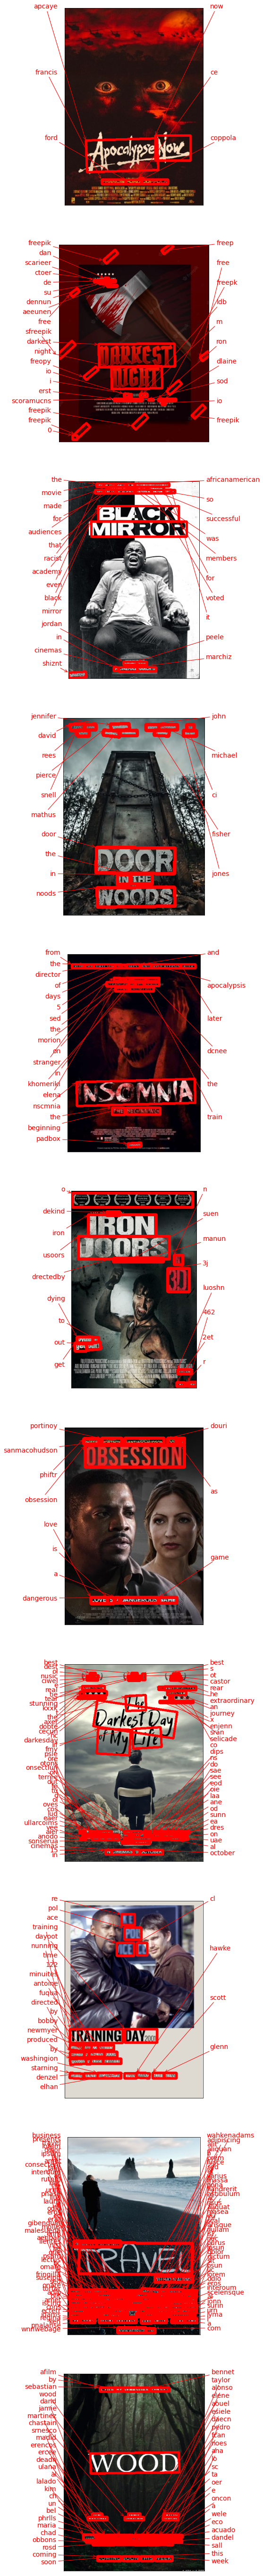

In [11]:
fig, axs = plt.subplots(nrows=len(images_keras_ocr), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_keras_ocr[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 테서랙트

In [35]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
        
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

print('=3')

=3


In [65]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image/'
img_file_path = work_dir + '/thedarkestday.jpeg'   #테스트용 이미지 경로

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

In [66]:
img_file_path

'/aiffel/aiffel/ocr_python/image//thedarkestday.jpeg'

In [67]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


wean


1g

ReRnlin!

cw


‘4

ik]

CINEMAS

OCTOBER

Done


# 회고

    손글씨체의 포스터의 문자 (" The Darkest Day of My Life) 를 대상으로 비교를 해본 결과 Google OCR API는 정확히 인식한 반면 Keras-ocr는 부정확하였으며, tesseract는 인식을 하지 못하였음.

![](ocr_comparison1.png)